In [12]:
import numpy as np
import util
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
trainfile = 'data/train.csv'
header, ids, X, Y = util.fetch_data(trainfile)

seed = 229
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Basic Classifier
with data split into training and dev sets

In [13]:
xgbreg = XGBRegressor(objective='binary:logistic', max_depth=7, learning_rate=0.1)

xgbreg.fit(X_train, y_train)

In [6]:
# gini score for training data
print(util.gini_normalized(y_train, xgbreg.predict(X_train)))

0.508186463103


In [7]:
# gini score for dev data
print(util.gini_normalized(y_test, xgbreg.predict(X_test)))

0.26292832966


In [8]:
xgbreg.fit(X, Y) # retrain with all of data
util.make_prediction(xgbreg, 'data/test.csv', 'predictions/xgboost.csv')

In [ ]:
trainsizes, traingini, testgini = util.learning_curves(xgbreg, X_train, X_test, y_train, y_test)
print(traingini)
print('')
print(testgini)
plt.figure()
plt.plot(trainsizes, traingini, label='train gini')
plt.plot(trainsizes, testgini, label='test gini')
plt.xlabel('Training set size')
plt.ylabel('Normalized Gini coefficient')
plt.title('XGBoost')
plt.legend()
plt.savefig('figures/learning_curves/xgboost.eps', format='eps', dpi=1000)

# Grid Search
with full data set and 3-fold CV

In [14]:
params_to_try = {'max_depth': range(1, 10), 'learning_rate':[0.05, 0.1, 0.2, 0.3]}
c_validator = GridSearchCV(xgbreg, params_to_try, scoring=util.gini_scorer, verbose=2, cv=3, n_jobs=-1)
c_validator.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] learning_rate=0.05, max_depth=1 .................................
[CV] .................. learning_rate=0.05, max_depth=1, total=  19.8s
[CV] learning_rate=0.05, max_depth=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s remaining:    0.0s


[CV] .................. learning_rate=0.05, max_depth=1, total=  19.8s
[CV] learning_rate=0.05, max_depth=1 .................................
[CV] .................. learning_rate=0.05, max_depth=1, total=  20.6s
[CV] learning_rate=0.05, max_depth=2 .................................
[CV] .................. learning_rate=0.05, max_depth=2, total=  40.3s
[CV] learning_rate=0.05, max_depth=2 .................................
[CV] .................. learning_rate=0.05, max_depth=2, total=  38.7s
[CV] learning_rate=0.05, max_depth=2 .................................
[CV] .................. learning_rate=0.05, max_depth=2, total=  38.6s
[CV] learning_rate=0.05, max_depth=3 .................................
[CV] .................. learning_rate=0.05, max_depth=3, total=  53.0s
[CV] learning_rate=0.05, max_depth=3 .................................
[CV] .................. learning_rate=0.05, max_depth=3, total=  50.2s
[CV] learning_rate=0.05, max_depth=3 .................................
[CV] .

[CV] ................... learning_rate=0.2, max_depth=2, total=  33.8s
[CV] learning_rate=0.2, max_depth=3 ..................................
[CV] ................... learning_rate=0.2, max_depth=3, total=  47.8s
[CV] learning_rate=0.2, max_depth=3 ..................................
[CV] ................... learning_rate=0.2, max_depth=3, total=  47.2s
[CV] learning_rate=0.2, max_depth=3 ..................................
[CV] ................... learning_rate=0.2, max_depth=3, total=  45.9s
[CV] learning_rate=0.2, max_depth=4 ..................................
[CV] ................... learning_rate=0.2, max_depth=4, total= 1.0min
[CV] learning_rate=0.2, max_depth=4 ..................................
[CV] ................... learning_rate=0.2, max_depth=4, total= 1.0min
[CV] learning_rate=0.2, max_depth=4 ..................................
[CV] ................... learning_rate=0.2, max_depth=4, total= 1.0min
[CV] learning_rate=0.2, max_depth=5 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 171.7min finished


0.32263188934


In [25]:
print(util.gini_normalized(y_train, c_validator.predict(X_train))) # training score
print(util.gini_normalized(y_test, c_validator.predict(X_test)))   # test score

0.32263188934
0.265216642249


In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [38]:
def plot_gridsearch_3d(c_validator, param1, param2, param1name, param2name):
    cv_results = c_validator.cv_results_
    test_mean = cv_results['mean_test_score']
    train_mean = cv_results['mean_train_score']
    
    x = np.tile(param2, len(param1))
    y = np.repeat(param1, len(param2))
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.scatter(x, y, test_mean)
    ax1.title("Grid Search Test Scores")
    ax1.xlabel(param2name)
    ax1.ylabel(param1name)
    
    ax2 = fig.add_subplot(111, projection='3d')
    ax2.scatter(x, y, train_mean)
    ax2.title("Grid Search Training Scores")
    ax2.xlabel(param2name)
    ax2.ylabel(param1name)
    fig.show()

In [18]:
def plot_gridsearch_2d(c_validator, param1, param2, param1name, param2name):
    cv_results = c_validator.cv_results_
    test_mean = cv_results['mean_test_score']
    train_mean = cv_results['mean_train_score']
    
    test_mean = np.array(test_mean).reshape(len(param1), len(param2))
    train_mean = np.array(train_mean).reshape(len(param1), len(param2))
    
    plt.figure(figsize=(15,15))
    plt.subplot(211)
    # Param2 is the X-axis, Param1 is represented as a different curve (color line)
    for idx, val in enumerate(param1):
        plt.plot(param2, test_mean[idx,:], '-o', label= param1name + ': ' + str(val))
        plt.title('Grid Search Test Scores')
        plt.xlabel(param2name)
        plt.legend()

    plt.subplot(212) 
    
    for idx, val in enumerate(param1):
        plt.plot(param2, train_mean[idx,:], '-o', label= param1name + ': ' + str(val))
        plt.title('Grid Search Training Scores')
        plt.xlabel(param2name)
        plt.legend()
    
    plt.show()
    plt.savefig('figures/gridsearch_scores')

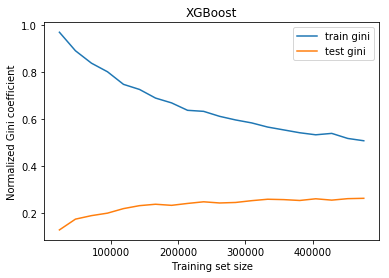

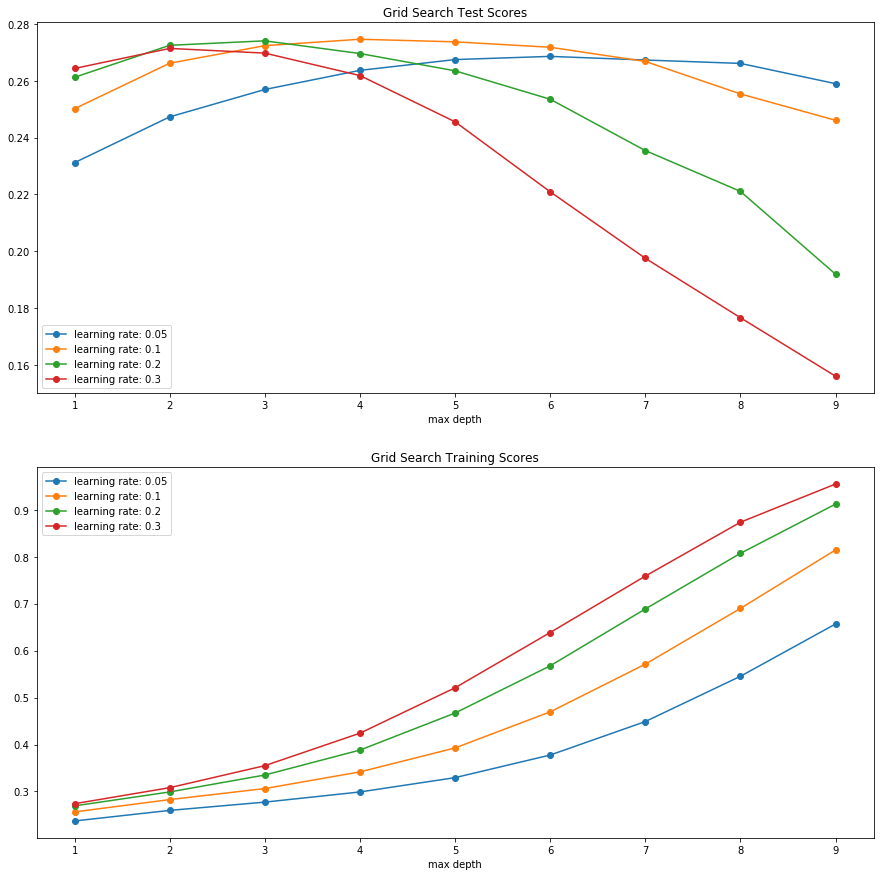

In [19]:
plot_gridsearch_2d(c_validator, params_to_try['learning_rate'], params_to_try['max_depth'], 'learning rate', 'max depth')

In [20]:
c_validator.best_params_

{'learning_rate': 0.1, 'max_depth': 4}

In [21]:
import pickle

In [22]:
pickle.dump(c_validator, open('models/xgbreg_gridsearch.pickle', 'wb'))

# Submission with model selected from grid search

In [24]:
xgb_gridsearch = XGBRegressor(objective='binary:logistic', max_depth=4, learning_rate=0.1)
xgb_gridsearch.fit(X, Y)
util.make_prediction(xgb_gridsearch, 'data/test.csv', 'predictions/xgboost.csv')